In [185]:
#general imports
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [186]:
#Machine learning packages
#PCA
from sklearn.decomposition import PCA
#LDA
from sklearn.datasets import make_blobs
#model evaluation (first used in LDA)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#Linear regression:
from sklearn.linear_model import LinearRegression
#used in Logistic regression sectionss
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
#used in SVM
from sklearn.datasets import load_digits
from sklearn.svm import SVC #"Support vector classifier"
#decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#K-means 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
#Hierarchical Clustering
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
#Perceptron Model
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
#MLP_classification
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

## Loading in the Data

In [187]:
credit_card_df = pd.read_csv('Creditcard.csv')
print(credit_card_df.shape)
credit_card_df.head(3)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## Project description

In [188]:
'''
each of the V features are principal components obtained with PCA
without counting the two features: 'Time' and 'Amount'
'Time':seconds elapsed between each transaction and the first transaction in the dataset
'Amount': transaction amount
The Class response variable:
‘1’ : in case of fraud and 
‘0’ : Not fraud
'''

"\neach of the V features are principal components obtained with PCA\nwithout counting the two features: 'Time' and 'Amount'\n'Time':seconds elapsed between each transaction and the first transaction in the dataset\n'Amount': transaction amount\nThe Class response variable:\n‘1’ : in case of fraud and \n‘0’ : Not fraud\n"

## initial data investigation

In [189]:
#seeing if there are gaps in the data
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [190]:
#looking at the values of each of these features
credit_card_df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [191]:
#comparing Fraud values to not fraud values
class_comparison_df = credit_card_df.groupby('Class').mean()
class_comparison_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [192]:
#looking at the class variable:
class_series = credit_card_df['Class']
class_series.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [193]:
'''
This means 284,315 instances of these transactions were real
492 transactions were fraud
'''
#looking at the proportion of fraud to not fraud instances:
100*(492/(284315 + 492))
#answer will be in pct

0.1727485630620034

In [194]:
#Not Fraud
not_fraud_df=credit_card_df[credit_card_df['Class']==0]
print(not_fraud_df.shape)
fraud_df=credit_card_df[credit_card_df['Class']==1]
print(fraud_df.shape)

(284315, 31)
(492, 31)


## First visualization of the data

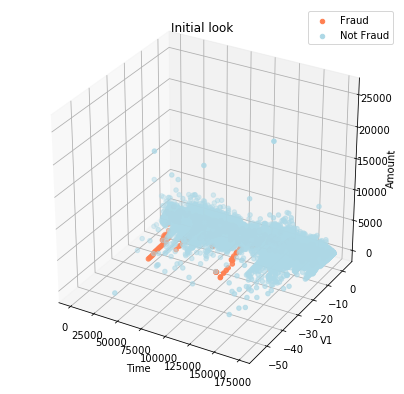

In [195]:
#got an error: "ValueError: Unknown projection '3d'"

#this solution from: https://stackoverflow.com/questions/3810865/matplotlib-unknown-projection-3d-error
from mpl_toolkits.mplot3d import axes3d, Axes3D

#Z axis will be V1
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

#Fraud
x=fraud_df['Time']
y=fraud_df['V1']
z=fraud_df["Amount"]
ax.scatter(x, y, z, c='coral',label='Fraud')
#Not Fraud
x=not_fraud_df['Time']
y=not_fraud_df['V1']
z=not_fraud_df["Amount"]
ax.scatter(x, y, z, c='lightblue', label='Not Fraud')
#adding some details on the plot
ax.set_title("Initial look")
ax.set_xlabel("Time")
ax.set_ylabel("V1")
ax.set_zlabel("Amount")
plt.legend()
plt.show()

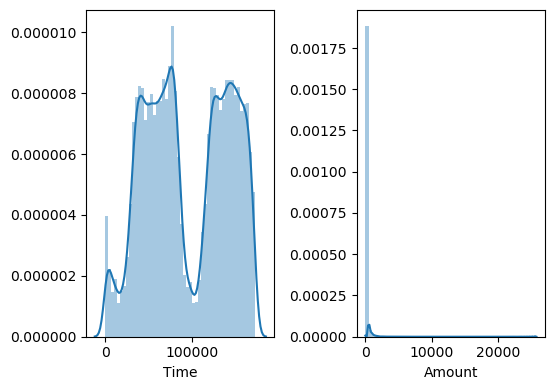

In [196]:
#This looks like time could be a specific factor in indicating fraud:
#not Fraud
cols = ['Time', 'Amount']
plt.figure(figsize=(30,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(not_fraud_df[col])
    i = i+1
plt.tight_layout()
plt.show()

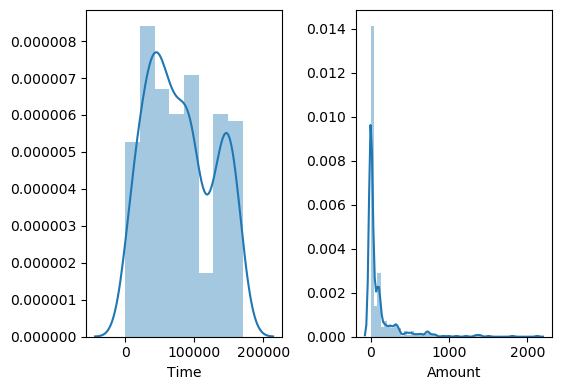

In [197]:
#Fraud
cols = ['Time', 'Amount']
plt.figure(figsize=(30,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(fraud_df[col])
    i = i+1
plt.tight_layout()
plt.show()

## Balance an unbalanced dataset

In [198]:
#we want the dataset to be more balanced, so we're subsampling 
smaller_non_fraud = not_fraud_df.sample(n=600)
# creating new data frame by concating legit_sample with fraud class
balanced_dataframes = [smaller_non_fraud, fraud_df]
balanced_df = pd.concat(balanced_dataframes, axis=0)
print(balanced_df.shape)
balanced_df.head()

(1092, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
175815,122501.0,-5.050661,4.932513,-4.200848,-0.939975,-1.807777,3.516303,-9.035994,-20.177914,-0.896286,...,-9.833991,4.143681,1.860711,0.354514,-0.739569,-0.943923,-1.108514,-0.310115,50.00,0
222164,142854.0,-3.766333,-1.098488,0.327797,0.190196,0.298671,-0.680208,-0.718417,0.731833,0.387933,...,-0.357769,-0.879669,-1.462984,-0.612126,0.184328,-0.393007,0.264537,-0.615416,124.51,0
229864,146083.0,2.050663,-0.258238,-2.188841,-0.674794,0.445054,-1.287574,0.661418,-0.489774,0.180491,...,0.152387,0.571002,-0.123838,-0.198686,0.334003,1.069857,-0.147655,-0.096419,47.43,0
117432,74676.0,-0.760875,1.165565,2.118197,2.365767,0.286737,-0.133930,0.502948,0.080771,-1.728668,...,-0.083886,-0.364130,0.126300,0.499743,-0.318988,-0.182462,-0.020685,0.114798,1.50,0
114514,73516.0,1.122347,-0.065788,-0.033608,-0.092581,-0.379159,-1.180542,0.398593,-0.251574,-0.357227,...,-0.274275,-1.016643,0.098728,0.580810,0.125546,0.697924,-0.125888,0.003377,77.80,0


In [199]:
#checking the proportion
balanced_df['Class'].value_counts()

0    600
1    492
Name: Class, dtype: int64

In [200]:
492/600

0.82

## Splitting into Training and Testing data

In [202]:
#Split the two features not put into the PCA
X = balanced_df.drop(columns='Class', axis=1)
y = balanced_df['Class']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(819, 30) (273, 30) (819,) (273,)


### Linear Discriminant Analysis

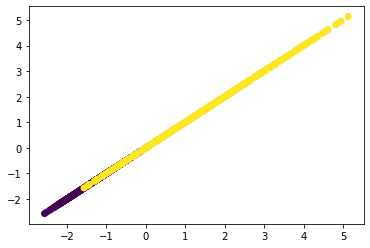

In [203]:
#Applying LDA
lda =LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:,0],X_lda[:,0], c=y)

In [204]:
#Classification by LDA
lda.fit(X_train,y_train)
yn=lda.predict(X_test)
#all print statements shorted to make notebook cleaner, take out [:5] to be full output
print(y_test[:5])
print(yn[:5])

76555     1
45203     1
48094     1
201098    1
41648     0
Name: Class, dtype: int64
[1 1 0 1 0]


In [205]:
difference_array = y_test-yn
print(difference_array[:5])

76555     0
45203     0
48094     1
201098    0
41648     0
Name: Class, dtype: int64


In [206]:
print(classification_report(y_test,yn))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       139
           1       0.97      0.84      0.90       134

    accuracy                           0.91       273
   macro avg       0.92      0.91      0.91       273
weighted avg       0.91      0.91      0.91       273



In [207]:
print(confusion_matrix(y_test,yn))

[[135   4]
 [ 21 113]]


### Linear Regression

In [208]:
#applying linear regression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
#printing parameters:
print(reg.intercept_)
print(reg.coef_)#I think this should be a single coefficient??

0.18619284095970606
[-3.74620429e-07 -2.48181049e-02 -4.42587488e-03 -1.18485192e-02
  5.46431619e-02  4.75233401e-03 -7.55807208e-03  3.68110744e-02
 -1.89967344e-02  9.17392722e-03 -1.73645004e-02  5.60900106e-03
  1.48919308e-02 -1.73829597e-02 -5.69711100e-02 -3.23036772e-03
 -9.09362507e-04 -1.00268709e-02  2.44056847e-02  1.12926789e-02
  2.93312183e-03  1.04984494e-02  3.66872115e-02 -3.12321661e-02
  1.92968730e-02  5.47111796e-03 -6.70734547e-02 -8.49056067e-03
  7.36702300e-02  8.69704575e-05]


In [210]:
#making predictions:
y_pred = reg.predict(X)
print(len(y_pred))
print(y_pred)

1092
[0.23703786 0.18244052 0.05771569 ... 0.39807919 0.64670895 0.31337697]


In [211]:
print("X length:", len(X))
print("y length:", len(y))

X length: 1092
y length: 1092


ValueError: x and y must be the same size

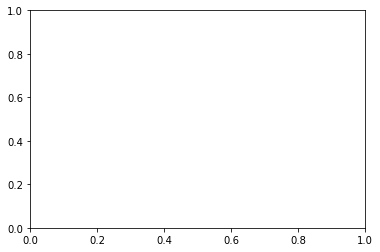

In [213]:
#not correct
plt.scatter(X, y,  color='blue') #erroring out, but I don't know why bc the lengths look like the ones above (same)
plt.plot(X, y_pred, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# calculating MSE and R2 score of the fitting
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(y, y_pred))

### Logistic Regression

In [160]:
#Building logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)
# Classifying test data
y_pred = model.predict(X_test)
#model evaluation
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       139
           1       0.95      0.89      0.92       134

    accuracy                           0.92       273
   macro avg       0.93      0.92      0.92       273
weighted avg       0.92      0.92      0.92       273

[[133   6]
 [ 15 119]]


C:\Users\AnnaA\Program_Unpacking\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Support Vector Machine (SVM)

In [161]:
#building linear SVM to classify the data
model = SVC(kernel='linear')
model.fit(X_train,y_train)
# Classifying test data using SVM
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       139
           1       0.97      0.82      0.89       134

    accuracy                           0.90       273
   macro avg       0.91      0.90      0.90       273
weighted avg       0.91      0.90      0.90       273



### Decision Tree

In [162]:
#building decision tree model to classify the data
dtc = DecisionTreeClassifier(criterion='gini', max_depth=10)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [163]:
# Classifying test data using Decision tree
y_p = dtc.predict(X_test)
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       139
           1       0.90      0.93      0.92       134

    accuracy                           0.92       273
   macro avg       0.92      0.92      0.92       273
weighted avg       0.92      0.92      0.92       273



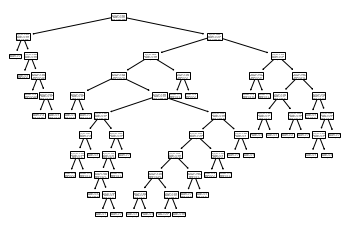

In [164]:
#plotting tree
tree.plot_tree(dtc)
plt.show()

### K-Means Clustering

In [166]:
#Applying K-Means clustering
kmeans = KMeans(n_clusters=10, max_iter=10000)
kmeans.fit(X)
labels = kmeans.predict(X)
#Silhouette score
score = silhouette_score(X, labels, metric = 'euclidean')
score

0.5586867533261317

In [167]:
#Homogeneity score
h_score = homogeneity_score(y, labels)
h_score

0.03416813932703282

### Artificial Neural Networks

#### Perceptron

In [168]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [170]:
y_pred = per_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       139
           1       0.00      0.00      0.00       134

    accuracy                           0.51       273
   macro avg       0.25      0.50      0.34       273
weighted avg       0.26      0.51      0.34       273



C:\Users\AnnaA\Program_Unpacking\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### MLP Classification

In [175]:
balanced_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [177]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('scaler', StandardScaler())
])

In [178]:
cat_pipeline = Pipeline([
                         ('ordinal_encoder', OrdinalEncoder()),
                         ('imputer', SimpleImputer(strategy='most_frequent')),
                         ('cat_encoder', OneHotEncoder(sparse=False))
])

In [179]:
num_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
cat_features = ['Class']

preprocess_pipeline = ColumnTransformer([
                                         ('num', num_pipeline, num_features),
                                         ('cat', cat_pipeline, cat_features)
])

In [180]:
X_train = preprocess_pipeline.fit_transform(balanced_df)
y_train = balanced_df['Class']
mlp_clf = MLPClassifier(hidden_layer_sizes=(30), activation='relu',
                        solver='sgd', learning_rate='constant',
                        max_iter=500, random_state=42)

C:\Users\AnnaA\Program_Unpacking\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [181]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=30, learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [182]:
mlp_clf_scores = cross_val_score(mlp_clf, X_train, y_train, cv=10)
mlp_clf_scores.mean()

0.9908340283569641

In [184]:
X_test = preprocess_pipeline.transform(balanced_df)
y_pred = mlp_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)